In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the .csv.gz files
patient_df = pd.read_csv('PATIENTS (2).csv.gz')
diagnosis_df = pd.read_csv('DIAGNOSES_ICD (1).csv.gz')
procedure_df = pd.read_csv('PROCEDURES_ICD (1).csv.gz')
admission_df = pd.read_csv('ADMISSIONS (1).csv.gz')
labevent_df = pd.read_csv('LABEVENTS.csv.gz')

Data Preprocessing

In [3]:
admission_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [4]:
# Convert 'ADMITTIME' to datetime format if it's not already
admission_df['ADMITTIME'] = pd.to_datetime(admission_df['ADMITTIME'])

# Group by 'SUBJECT_ID' and get the first admission date
first_admissions = admission_df.groupby('SUBJECT_ID')['ADMITTIME'].min().reset_index()

# Rename the column for clarity
first_admissions.rename(columns={'ADMITTIME': 'First_Admission_Date'}, inplace=True)

print(first_admissions)

       SUBJECT_ID First_Admission_Date
0               2  2138-07-17 19:04:00
1               3  2101-10-20 19:08:00
2               4  2191-03-16 00:28:00
3               5  2103-02-02 04:31:00
4               6  2175-05-30 07:15:00
...           ...                  ...
46515       99985  2181-01-27 02:47:00
46516       99991  2184-12-24 08:30:00
46517       99992  2144-07-25 18:03:00
46518       99995  2147-02-08 08:00:00
46519       99999  2117-12-30 07:15:00

[46520 rows x 2 columns]


In [5]:
patient_df

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [6]:
# Merge the First Admission with the Patient file
patient_merged_df = patient_df.merge(first_admissions, on='SUBJECT_ID', how='left')
patient_merged_df

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,First_Admission_Date
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,2149-12-17 20:41:00
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,2188-11-12 09:22:00
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0,2110-07-27 06:46:00
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0,2133-03-31 04:24:00
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0,2174-01-21 20:58:00
...,...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0,2111-09-30 12:04:00
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0,2161-07-15 12:00:00
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1,2135-01-06 07:15:00
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0,2129-01-03 07:15:00


In [7]:
### Calculate patients' age
# Convert to datetime, handling errors
patient_merged_df['DOB'] = pd.to_datetime(patient_merged_df['DOB'], errors='coerce')
patient_merged_df['First_Admission_Date'] = pd.to_datetime(patient_merged_df['First_Admission_Date'], errors='coerce')

# Calculate age at first admission safely
def calculate_age(row):
    dob = row['DOB'].to_pydatetime()
    admission_date = row['First_Admission_Date'].to_pydatetime()

    if dob.year < 1900:
        return 300
    else:
        age_days = (admission_date - dob).days
        return round(age_days / 365.25, 0)

patient_merged_df['Age_at_First_Admission'] = patient_merged_df.apply(calculate_age, axis=1)

print(patient_merged_df[['SUBJECT_ID', 'DOB', 'First_Admission_Date', 'Age_at_First_Admission']])

       SUBJECT_ID        DOB First_Admission_Date  Age_at_First_Admission
0             249 2075-03-13  2149-12-17 20:41:00                    75.0
1             250 2164-12-27  2188-11-12 09:22:00                    24.0
2             251 2090-03-15  2110-07-27 06:46:00                    20.0
3             252 2078-03-06  2133-03-31 04:24:00                    55.0
4             253 2089-11-26  2174-01-21 20:58:00                    84.0
...           ...        ...                  ...                     ...
46515       44089 2026-05-25  2111-09-30 12:04:00                    85.0
46516       44115 2124-07-27  2161-07-15 12:00:00                    37.0
46517       44123 2049-11-26  2135-01-06 07:15:00                    85.0
46518       44126 2076-07-25  2129-01-03 07:15:00                    52.0
46519       44128 2098-07-25  2149-06-08 15:21:00                    51.0

[46520 rows x 4 columns]


In [8]:
# Keep only patients under 120 years old
patient_merged_df = patient_merged_df[patient_merged_df['Age_at_First_Admission'] < 120]
patient_merged_df

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,First_Admission_Date,Age_at_First_Admission
0,234,249,F,2075-03-13,NaN,NaN,NaN,0,2149-12-17 20:41:00,75.0
1,235,250,F,2164-12-27,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,2188-11-12 09:22:00,24.0
2,236,251,M,2090-03-15,NaN,NaN,NaN,0,2110-07-27 06:46:00,20.0
3,237,252,M,2078-03-06,NaN,NaN,NaN,0,2133-03-31 04:24:00,55.0
4,238,253,F,2089-11-26,NaN,NaN,NaN,0,2174-01-21 20:58:00,84.0
...,...,...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25,NaN,NaN,NaN,0,2111-09-30 12:04:00,85.0
46516,31841,44115,F,2124-07-27,NaN,NaN,NaN,0,2161-07-15 12:00:00,37.0
46517,31842,44123,F,2049-11-26,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1,2135-01-06 07:15:00,85.0
46518,31843,44126,F,2076-07-25,NaN,NaN,NaN,0,2129-01-03 07:15:00,52.0


In [9]:
diagnosis_df

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [10]:
# We can start by selecting Myocardial Infarction (MI) ICD-9 codes starting with "410" as the diagnosis of interest. We’ll create two cohorts:

## Case Cohort: Patients with the MI diagnosis
## Control Cohort: Patients who do not have the MI diagnosis

In [11]:
# Define regex pattern for Myocardial Infarction (MI) ICD-9 codes starting with "410"
mi_code_pattern = r'^410'

# Filter for MI cases in diagnosis dataset using regex
mi_case_cohort = diagnosis_df[diagnosis_df['ICD9_CODE'].astype(str).str.match(mi_code_pattern)]

mi_case_cohort

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
29,1489,112,174105,2.0,41071
110,1570,123,195632,1.0,41011
210,1670,130,198214,1.0,41071
227,1687,133,191817,1.0,41071
365,594,73,194730,1.0,41001
...,...,...,...,...,...
650165,640477,97609,166990,2.0,41091
650247,637752,97018,177339,1.0,41071
650466,630640,95561,152354,5.0,41001
650528,631638,95782,195565,9.0,41092


In [12]:
# Merge MI case cohort with the Admission file,and sort by the earliest admission date
mi_cases_earliest = mi_case_cohort.merge(admission_df, on=['HADM_ID', 'SUBJECT_ID'], how='inner')
mi_cases_earliest = mi_cases_earliest.sort_values(by=['SUBJECT_ID', 'ADMITTIME']).drop_duplicates(subset=['SUBJECT_ID'])

mi_cases_earliest

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
7,8,3,145834,5.0,41071,2,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,...,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
8,112,21,109451,1.0,41071,19,2134-09-11 12:17:00,2134-09-24 16:15:00,NaN,EMERGENCY,...,Medicare,NaN,JEWISH,MARRIED,WHITE,2134-09-11 09:22:00,2134-09-11 22:30:00,CONGESTIVE HEART FAILURE,0,1
9,176,24,161859,1.0,41041,24,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,...,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
10,180,25,129635,1.0,41071,25,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,...,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
11,236,34,115799,1.0,41071,33,2186-07-18 16:46:00,2186-07-20 16:00:00,NaN,EMERGENCY,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHEST PAIN\CATH,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,649178,99562,101705,2.0,41071,58852,2183-03-06 01:31:00,2183-03-21 15:50:00,NaN,EMERGENCY,...,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,2183-03-05 22:28:00,2183-03-06 02:58:00,CORONARY ARTERY DISEASE;RENAL FAILURE,0,1
5401,650171,99809,154672,7.0,41072,58915,2166-02-04 13:15:00,2166-02-08 15:20:00,NaN,ELECTIVE,...,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
5478,650194,99817,195557,2.0,41071,58918,2166-10-14 23:16:00,2166-11-20 12:00:00,2166-11-20 12:00:00,EMERGENCY,...,Medicare,ENGL,PROTESTANT QUAKER,SINGLE,UNKNOWN/NOT SPECIFIED,2166-10-14 22:54:00,2166-10-14 23:25:00,ABDOMINAL AORTIC ANEURYSM,1,1
5488,650854,99944,185654,3.0,41071,58961,2161-02-16 20:14:00,2161-02-21 16:45:00,NaN,EMERGENCY,...,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,NaN,NaN,CHEST PAIN;CONGESTIVE HEART FAILURE\CARDIAC CATH,0,1


In [13]:
# Merge with the Patient file for full demographic data
mi_cases_earliest = mi_cases_earliest.merge(patient_merged_df, on = 'SUBJECT_ID', how = 'inner')

mi_cases_earliest  #4671 matching cases

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,...,HAS_CHARTEVENTS_DATA,ROW_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,First_Admission_Date,Age_at_First_Admission
0,8,3,145834,5.0,41071,2,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,...,1,2,M,2025-04-11,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,2101-10-20 19:08:00,77.0
1,112,21,109451,1.0,41071,19,2134-09-11 12:17:00,2134-09-24 16:15:00,NaN,EMERGENCY,...,1,18,M,2047-04-04,2135-02-08 00:00:00,2135-02-08 00:00:00,2135-02-08 00:00:00,1,2134-09-11 12:17:00,87.0
2,176,24,161859,1.0,41041,24,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,...,1,21,M,2100-05-31,NaN,NaN,NaN,0,2139-06-06 16:14:00,39.0
3,180,25,129635,1.0,41071,25,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,...,1,22,M,2101-11-21,NaN,NaN,NaN,0,2160-11-02 02:06:00,59.0
4,296,37,188670,1.0,41071,39,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,...,1,33,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,2183-08-21 16:48:00,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,649178,99562,101705,2.0,41071,58852,2183-03-06 01:31:00,2183-03-21 15:50:00,NaN,EMERGENCY,...,1,46413,M,2120-12-29,2183-07-08 00:00:00,2183-07-08 00:00:00,NaN,1,2183-02-02 15:13:00,62.0
4667,650171,99809,154672,7.0,41072,58915,2166-02-04 13:15:00,2166-02-08 15:20:00,NaN,ELECTIVE,...,1,46466,M,2096-03-03,NaN,NaN,NaN,0,2166-02-04 13:15:00,70.0
4668,650194,99817,195557,2.0,41071,58918,2166-10-14 23:16:00,2166-11-20 12:00:00,2166-11-20 12:00:00,EMERGENCY,...,1,46469,M,2096-02-28,2166-11-20 00:00:00,2166-11-20 00:00:00,2166-11-20 00:00:00,1,2166-10-14 23:16:00,71.0
4669,650854,99944,185654,3.0,41071,58961,2161-02-16 20:14:00,2161-02-21 16:45:00,NaN,EMERGENCY,...,1,46507,F,2075-08-25,2161-04-11 00:00:00,NaN,2161-04-11 00:00:00,1,2161-02-16 20:14:00,85.0


In [14]:
# Create control cohort by selecting patients not in the case cohort
all_subject_ids = set(admission_df['SUBJECT_ID'].unique())
mi_subject_ids = set(mi_cases_earliest['SUBJECT_ID'].unique())
control_subject_ids = all_subject_ids - mi_subject_ids
control_group = admission_df[admission_df['SUBJECT_ID'].isin(control_subject_ids)]
control_group

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1
6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [15]:
# Merge with the Patient file for full demographic data
control_group = control_group.merge(patient_merged_df, on = 'SUBJECT_ID', how = 'inner')

control_group

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,First_Admission_Date,Age_at_First_Admission
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,1,19,F,2131-05-07,NaN,NaN,NaN,0,2196-04-09 12:26:00,65.0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,1,20,M,2082-07-17,NaN,NaN,NaN,0,2153-09-03 07:15:00,71.0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,1,20,M,2082-07-17,NaN,NaN,NaN,0,2153-09-03 07:15:00,71.0
3,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,1,23,M,2054-05-04,2128-02-25 00:00:00,NaN,2128-02-25 00:00:00,1,2126-05-06 15:16:00,72.0
4,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,1,24,F,2191-11-30,NaN,NaN,NaN,0,2191-11-30 22:16:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,1,46213,F,2111-11-05,NaN,NaN,NaN,0,2131-03-30 21:13:00,19.0
49348,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,1,46214,F,2067-09-21,2151-03-06 00:00:00,2151-03-06 00:00:00,NaN,1,2151-03-05 20:00:00,83.0
49349,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,1,46215,M,2158-03-02,NaN,NaN,NaN,0,2200-09-12 07:15:00,43.0
49350,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,0,46216,F,2068-02-04,NaN,NaN,NaN,0,2128-11-11 02:29:00,61.0


In [16]:
# Create a random sample of 4671 rows from the control cohort
control_sample = control_group.drop_duplicates(subset='SUBJECT_ID').sample(n=4671, random_state=42)
control_sample

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,First_Admission_Date,Age_at_First_Admission
3109,3853,3196,155993,2105-04-23 07:15:00,2105-04-30 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,1,3026,M,2042-03-08,2108-01-25 00:00:00,2108-01-25 00:00:00,NaN,1,2105-04-23 07:15:00,63.0
19826,24543,20105,172913,2136-08-02 22:45:00,2136-08-23 14:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,1,18975,M,2098-04-26,NaN,NaN,NaN,0,2136-08-02 22:45:00,38.0
41483,50385,73012,128291,2131-06-05 16:22:00,2131-06-09 12:30:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,1,39524,F,2105-06-14,NaN,NaN,NaN,0,2131-06-05 16:22:00,26.0
33140,36463,29934,133319,2117-07-21 15:28:00,2117-07-29 13:40:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,1,28156,M,2044-07-14,NaN,NaN,NaN,0,2117-07-21 15:28:00,73.0
10500,13311,10879,152666,2148-03-20 07:15:00,2148-03-22 09:51:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,1,10291,F,2099-01-31,NaN,NaN,NaN,0,2148-03-20 07:15:00,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,24411,19988,141007,2171-04-22 16:10:00,2171-04-26 15:16:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,Private,...,1,18866,M,2171-04-22,NaN,NaN,NaN,0,2171-04-22 16:10:00,0.0
48451,58726,99229,150893,2125-12-09 15:11:00,2126-01-06 11:30:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,...,1,46319,F,2048-03-08,2126-04-04 00:00:00,NaN,2126-04-04 00:00:00,1,2125-12-09 15:11:00,78.0
25302,29950,24541,157578,2200-10-18 10:43:00,2200-10-22 15:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,1,23156,M,2133-07-23,NaN,NaN,NaN,0,2200-10-18 10:43:00,67.0
9759,13448,10992,145405,2105-02-13 19:26:00,2105-02-20 13:25:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,1,10396,F,2021-12-08,2105-10-08 00:00:00,2105-10-08 00:00:00,2105-10-08 00:00:00,1,2105-02-13 19:26:00,83.0


In [17]:
# Combine both cohorts, assigning a label 1 for MI cases and 0 for controls
mi_cases_earliest['LABEL'] = 1
control_sample['LABEL'] = 0
final_df = pd.concat([mi_cases_earliest, control_sample], ignore_index=True)

# Convert to datetime format if it's not already
final_df['ADMITTIME'] = pd.to_datetime(final_df['ADMITTIME'])
final_df['DISCHTIME'] = pd.to_datetime(final_df['DISCHTIME'])

final_df['STAYTIME (day)'] = (final_df['DISCHTIME'] - final_df['ADMITTIME']).dt.days
final_df

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,...,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,First_Admission_Date,Age_at_First_Admission,LABEL,STAYTIME (day)
0,8,3,145834,5.0,41071,2,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,...,M,2025-04-11,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,2101-10-20 19:08:00,77.0,1,10
1,112,21,109451,1.0,41071,19,2134-09-11 12:17:00,2134-09-24 16:15:00,NaN,EMERGENCY,...,M,2047-04-04,2135-02-08 00:00:00,2135-02-08 00:00:00,2135-02-08 00:00:00,1,2134-09-11 12:17:00,87.0,1,13
2,176,24,161859,1.0,41041,24,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,...,M,2100-05-31,NaN,NaN,NaN,0,2139-06-06 16:14:00,39.0,1,2
3,180,25,129635,1.0,41071,25,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,...,M,2101-11-21,NaN,NaN,NaN,0,2160-11-02 02:06:00,59.0,1,3
4,296,37,188670,1.0,41071,39,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,...,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,2183-08-21 16:48:00,69.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,24411,19988,141007,NaN,NaN,18866,2171-04-22 16:10:00,2171-04-26 15:16:00,NaN,NEWBORN,...,M,2171-04-22,NaN,NaN,NaN,0,2171-04-22 16:10:00,0.0,0,3
9338,58726,99229,150893,NaN,NaN,46319,2125-12-09 15:11:00,2126-01-06 11:30:00,NaN,EMERGENCY,...,F,2048-03-08,2126-04-04 00:00:00,NaN,2126-04-04 00:00:00,1,2125-12-09 15:11:00,78.0,0,27
9339,29950,24541,157578,NaN,NaN,23156,2200-10-18 10:43:00,2200-10-22 15:30:00,NaN,EMERGENCY,...,M,2133-07-23,NaN,NaN,NaN,0,2200-10-18 10:43:00,67.0,0,4
9340,13448,10992,145405,NaN,NaN,10396,2105-02-13 19:26:00,2105-02-20 13:25:00,NaN,EMERGENCY,...,F,2021-12-08,2105-10-08 00:00:00,2105-10-08 00:00:00,2105-10-08 00:00:00,1,2105-02-13 19:26:00,83.0,0,6


In [18]:
final_df.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE', 'ROW_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG',
       'First_Admission_Date', 'Age_at_First_Admission', 'LABEL',
       'STAYTIME (day)'],
      dtype='object')

In [19]:
# Define columns to keep
columns_to_keep = [
    'SUBJECT_ID', 'HADM_ID', 'STAYTIME (day)',
    'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
    'MARITAL_STATUS', 'ETHNICITY', 'LABEL', 'GENDER', 'Age_at_First_Admission']

# Drop other columns
final_df_cleaned = final_df[columns_to_keep]

# Display the cleaned DataFrame
final_df_cleaned


,SUBJECT_ID,HADM_ID,STAYTIME (day),ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,MARITAL_STATUS,ETHNICITY,LABEL,GENDER,Age_at_First_Admission
0,3,145834,10,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,WHITE,1,M,77.0
1,21,109451,13,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,MARRIED,WHITE,1,M,87.0
2,24,161859,2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,SINGLE,WHITE,1,M,39.0
3,25,129635,3,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,MARRIED,WHITE,1,M,59.0
4,37,188670,5,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,MARRIED,WHITE,1,M,69.0
...,...,...,...,...,...,...,...,...,...,...,...
9337,19988,141007,3,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,NaN,WHITE,0,M,0.0
9338,99229,150893,27,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,WIDOWED,PATIENT DECLINED TO ANSWER,0,F,78.0
9339,24541,157578,4,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,SINGLE,WHITE,0,M,67.0
9340,10992,145405,6,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,SINGLE,WHITE,0,F,83.0


In [20]:
procedure_df

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331
...,...,...,...,...,...
240090,228330,67415,150871,5,3736
240091,228331,67415,150871,6,3893
240092,228332,67415,150871,7,8872
240093,228333,67415,150871,8,3893


In [21]:
# Check values in ICD9_CODE
procedure_df['ICD9_CODE'].value_counts()

ICD9_CODE
3893    14731
9604    10333
966      9300
9671     9100
9904     7244
        ...  
1681        1
9624        1
9764        1
149         1
3837        1
Name: count, Length: 2009, dtype: int64

In [22]:
# Perform one-hot encoding on the Procedures dataset
procedures_onehot = pd.get_dummies(procedure_df['ICD9_CODE'], prefix='ICD9').astype(int)

# Add SUBJECT_ID and HADM_ID columns back to the one-hot encoded DF
procedures_onehot['SUBJECT_ID'] = procedure_df['SUBJECT_ID']
procedures_onehot['HADM_ID'] = procedure_df['HADM_ID']

# Aggregate by SUBJECT_ID and HADM_ID, using 'max' to capture occurrences
procedures_onehot_agg = procedures_onehot.groupby(['SUBJECT_ID', 'HADM_ID']).agg('max').reset_index()

# Merge the aggregated procedure data with final_df_cleaned
merged_df = final_df_cleaned.merge(procedures_onehot_agg, on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Display the resulting merged DF
merged_df

,SUBJECT_ID,HADM_ID,STAYTIME (day),ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,MARITAL_STATUS,ETHNICITY,LABEL,GENDER,...,ICD9_9977,ICD9_9978,ICD9_9979,ICD9_9981,ICD9_9982,ICD9_9983,ICD9_9984,ICD9_9988,ICD9_9995,ICD9_9999
0,3,145834,10,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,WHITE,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,109451,13,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,MARRIED,WHITE,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,161859,2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,SINGLE,WHITE,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,129635,3,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,MARRIED,WHITE,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,188670,5,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,MARRIED,WHITE,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,19988,141007,3,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,NaN,WHITE,0,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9338,99229,150893,27,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,WIDOWED,PATIENT DECLINED TO ANSWER,0,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9339,24541,157578,4,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,SINGLE,WHITE,0,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9340,10992,145405,6,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,SINGLE,WHITE,0,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
labevent_df

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [24]:
# Load lab item codes with descriptions
lab_item_codes = pd.read_csv('Lab_Item_Codes-1.txt', delimiter='\t', header=0, names=['ITEMID', 'DESCRIPTION'])

# Ensure ITEMID is of the same type as in labevent_df
lab_item_codes['ITEMID'] = lab_item_codes['ITEMID'].astype(int)

# Merge labevent_df with lab_item_codes
labevent_df = labevent_df.merge(lab_item_codes, on='ITEMID', how='left')

# Replace ITEMID with description for interpretability
labevent_df['LAB_ITEM'] = labevent_df['DESCRIPTION']
labevent_df.drop(columns=['DESCRIPTION', 'ITEMID'], inplace=True)

labevent_df

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,LAB_ITEM
0,281,3,NaN,2101-10-12 16:07:00,7.39,7.39,units,NaN,pH
1,282,3,NaN,2101-10-12 18:17:00,ART,NaN,NaN,NaN,NaN
2,283,3,NaN,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN,Base Excess
3,284,3,NaN,2101-10-12 18:17:00,22,22.00,mEq/L,NaN,Calculated Total CO2
4,285,3,NaN,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal,Free Calcium
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,2109-12-30 01:40:00,26,26.00,mEq/L,NaN,Bicarbonate
27854051,27428436,96443,103219.0,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal,"Bilirubin, Total"
27854052,27428437,96443,103219.0,2109-12-30 01:40:00,97,97.00,mEq/L,NaN,Chloride
27854053,27428438,96443,103219.0,2109-12-30 01:40:00,2,2.00,ng/mL,NaN,"Creatine Kinase, MB Isoenzyme"


In [25]:
# Check distribution of the LAB_ITEM column
labevent_df['LAB_ITEM'].value_counts()

LAB_ITEM
Glucose                 1046912
Hematocrit               881769
Potassium                845739
Hemoglobin               842156
Sodium                   808401
                         ...   
Young                         2
Osmolality, Ascites           2
Lipase, Pleural               1
Albumin, Joint Fluid          1
Hyphenated Yeast              1
Name: count, Length: 544, dtype: int64

In [26]:
# Pivot the data so that each lab test item becomes a column, with the corresponding 'max' VALUENUM as the value
lab_items_pivot = labevent_df.pivot_table(
    index=['SUBJECT_ID', 'HADM_ID'], 
    columns='LAB_ITEM', 
    values='VALUENUM', 
    aggfunc='max' 
).reset_index()

# Merge the pivoted data with the existing merged_df
merged_df = merged_df.merge(lab_items_pivot, on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Display the resulting merged DF
merged_df

,SUBJECT_ID,HADM_ID,STAYTIME (day),ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,MARITAL_STATUS,ETHNICITY,LABEL,GENDER,...,White Blood Cells,Yeast,Young,Young Cells,pCO2,"pCO2, Body Fluid",pH,pO2,"pO2, Body Fluid",tacroFK
0,3,145834,10,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,WHITE,1,M,...,24.4,NaN,NaN,NaN,50.0,NaN,7.59,329.0,NaN,NaN
1,21,109451,13,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,MARRIED,WHITE,1,M,...,23.5,NaN,NaN,NaN,62.0,NaN,7.51,182.0,NaN,NaN
2,24,161859,2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,SINGLE,WHITE,1,M,...,9.8,NaN,NaN,NaN,40.0,NaN,7.42,72.0,NaN,NaN
3,25,129635,3,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,MARRIED,WHITE,1,M,...,13.0,NaN,NaN,NaN,54.0,NaN,7.39,167.0,NaN,NaN
4,37,188670,5,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,MARRIED,WHITE,1,M,...,18.0,NaN,NaN,NaN,56.0,NaN,7.48,96.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,19988,141007,3,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,NaN,WHITE,0,M,...,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9338,99229,150893,27,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,WIDOWED,PATIENT DECLINED TO ANSWER,0,F,...,21.4,NaN,NaN,NaN,55.0,NaN,7.50,388.0,NaN,NaN
9339,24541,157578,4,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,SINGLE,WHITE,0,M,...,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9340,10992,145405,6,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,SINGLE,WHITE,0,F,...,19.6,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN


In [27]:
# Before training data: One-hot encoding for remaining categorical columns in the merged_df
categorical_columns = ['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'MARITAL_STATUS', 'ETHNICITY', 'GENDER']
merged_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

In [28]:
# Exclude Troponin T/I from the training data of MI diagnosis to avoid data leakage
training_df = merged_df.drop(columns = ['Troponin T', 'Troponin I'])
training_df

,SUBJECT_ID,HADM_ID,STAYTIME (day),LABEL,Age_at_First_Admission,ICD9_10,ICD9_11,ICD9_12,ICD9_13,ICD9_14,...,ETHNICITY_PATIENT DECLINED TO ANSWER,ETHNICITY_PORTUGUESE,ETHNICITY_UNABLE TO OBTAIN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN,GENDER_M
0,3,145834,10,1,77.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
1,21,109451,13,1,87.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
2,24,161859,2,1,39.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
3,25,129635,3,1,59.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
4,37,188670,5,1,69.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,19988,141007,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
9338,99229,150893,27,0,78.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
9339,24541,157578,4,0,67.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
9340,10992,145405,6,0,83.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


Training ML Models

In [32]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, make_scorer, accuracy_score, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier

import matplotlib.pyplot as plt

In [30]:
# Define features (X) and target (y)
X = training_df.drop(columns=['SUBJECT_ID', 'HADM_ID', 'LABEL'])
y = training_df['LABEL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

XGBoost Classifier

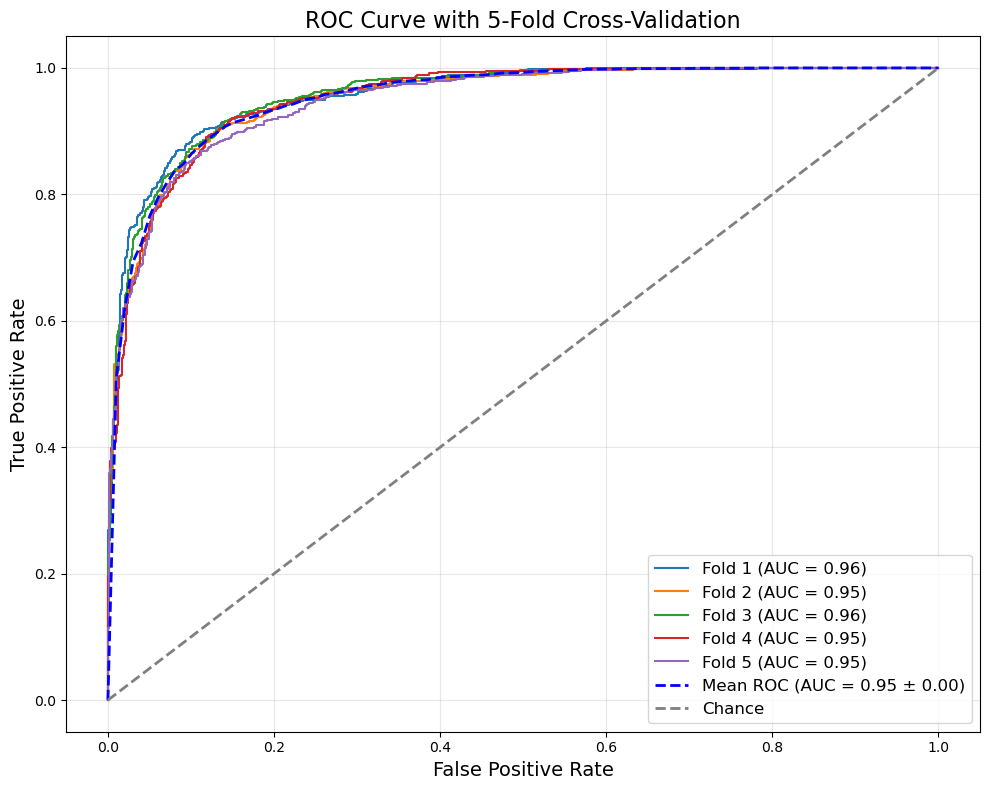

In [33]:
# Define the model
model = XGBClassifier(random_state=42, eval_metric="logloss")

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics and ROC data
metrics_list = []
tprs = []  # True Positive Rates for ROC
mean_fpr = np.linspace(0, 1, 100)  # Mean False Positive Rates for ROC
auc_scores = []  # AUC scores for ROC

# Function to calculate sensitivity, specificity, PPV, NPV
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    ppv = cm[1, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) != 0 else 0
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0]) if (cm[0, 0] + cm[1, 0]) != 0 else 0
    return sensitivity, specificity, ppv, npv

# Perform cross-validation
plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    sensitivity, specificity, ppv, npv = calculate_metrics(y_test, y_pred)
    
    # Store metrics in a dictionary
    metrics_list.append({
        "Fold": fold + 1,
        "Accuracy": accuracy,
        "AUC": roc_auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "PPV": ppv,
        "NPV": npv
    })
    
    # Plot ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_scores.append(roc_auc)
    
    # Interpolate TPR for mean curve
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    plt.plot(fpr, tpr, label=f"Fold {fold + 1} (AUC = {roc_auc:.2f})")

# Compute mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_scores)

# Plot the mean ROC curve
plt.plot(mean_fpr, mean_tpr, color="blue", linestyle="--",
         label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2)

# Plot chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Chance")

# Add labels, legend, and title
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve with 5-Fold Cross-Validation", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

# Show the ROC plot
plt.tight_layout()
plt.show()

In [34]:
# Convert the metrics list to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display metrics for each fold
print(metrics_df)

# Calculate and display the average metrics across all folds
average_metrics = metrics_df.drop(columns=['Fold']).mean()
print("\nAverage Metrics:")
print(average_metrics)

   Fold  Accuracy       AUC  Sensitivity  Specificity       PPV       NPV
0     1  0.893526  0.957572     0.894118     0.892934  0.893162  0.893891
1     2  0.880685  0.952122     0.882227     0.879144  0.879402  0.881974
2     3  0.883833  0.957403     0.888651     0.879015  0.880170  0.887568
3     4  0.885974  0.952625     0.890792     0.881156  0.882291  0.889730
4     5  0.876874  0.948714     0.868308     0.885439  0.883442  0.870526

Average Metrics:
Accuracy       0.884178
AUC            0.953687
Sensitivity    0.884819
Specificity    0.883538
PPV            0.883693
NPV            0.884738
dtype: float64


<Figure size 1000x1200 with 0 Axes>

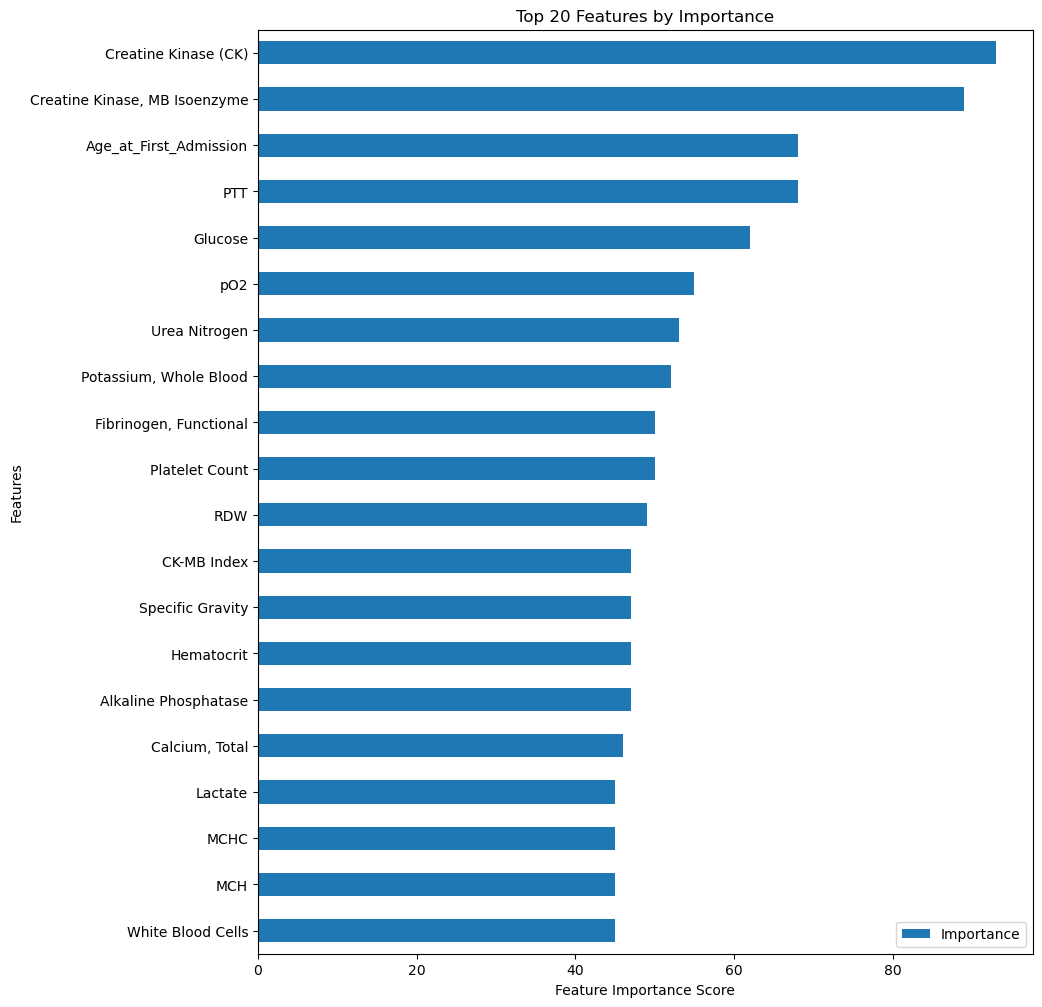

In [35]:
####### Feature importance visualization
model.fit(X_train, y_train)

# Feature importance extraction
xgb_importances = model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame and sort by importance
xgb_importances_df = pd.DataFrame({
    'Feature': xgb_importances.keys(),
    'Importance': xgb_importances.values()
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(10, 12))
xgb_importances_df.head(20).set_index('Feature').plot(kind='barh', figsize=(10, 12), title='Top 20 Features')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Features by Importance')
plt.show()

HistGradient Boosting Classifier

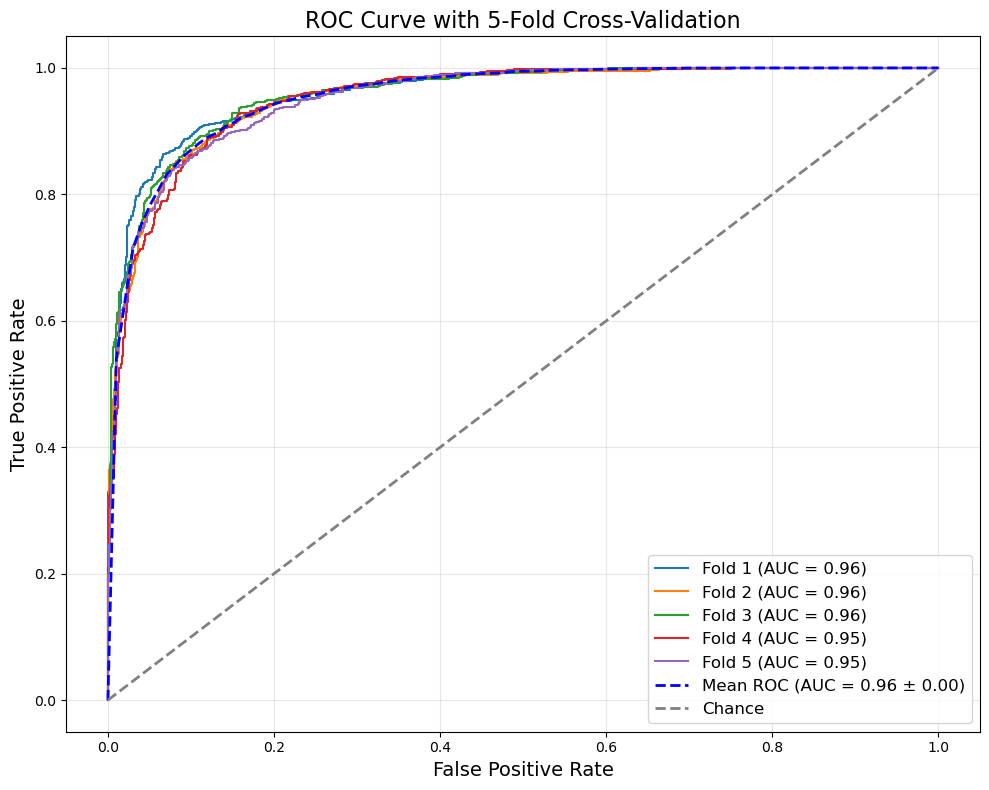

In [36]:
# Define the model
model = HistGradientBoostingClassifier(random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics and ROC data
metrics_list = []
tprs = []  # True Positive Rates for ROC
mean_fpr = np.linspace(0, 1, 100)  # Mean False Positive Rates for ROC
auc_scores = []  # AUC scores for ROC

# Function to calculate sensitivity, specificity, PPV, NPV
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    ppv = cm[1, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) != 0 else 0
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0]) if (cm[0, 0] + cm[1, 0]) != 0 else 0
    return sensitivity, specificity, ppv, npv

# Perform cross-validation
plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    sensitivity, specificity, ppv, npv = calculate_metrics(y_test, y_pred)
    
    # Store metrics in a dictionary
    metrics_list.append({
        "Fold": fold + 1,
        "Accuracy": accuracy,
        "AUC": roc_auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "PPV": ppv,
        "NPV": npv
    })
    
    # Plot ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_scores.append(roc_auc)
    
    # Interpolate TPR for mean curve
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    plt.plot(fpr, tpr, label=f"Fold {fold + 1} (AUC = {roc_auc:.2f})")

# Compute mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_scores)

# Plot the mean ROC curve
plt.plot(mean_fpr, mean_tpr, color="blue", linestyle="--",
         label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2)

# Plot chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Chance")

# Add labels, legend, and title
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve with 5-Fold Cross-Validation", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

# Show the ROC plot
plt.tight_layout()
plt.show()

In [37]:
# Convert the metrics list to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display metrics for each fold
print(metrics_df)

# Calculate and display the average metrics across all folds
average_metrics = metrics_df.drop(columns=['Fold']).mean()
print("\nAverage Metrics:")
print(average_metrics)

   Fold  Accuracy       AUC  Sensitivity  Specificity       PPV       NPV
0     1  0.896736  0.961150     0.898396     0.895075  0.895522  0.897959
1     2  0.883360  0.955471     0.883298     0.883422  0.883298  0.883422
2     3  0.888116  0.959531     0.898287     0.877944  0.880378  0.896175
3     4  0.879015  0.953931     0.870450     0.887580  0.885621  0.872632
4     5  0.879015  0.953881     0.869379     0.888651  0.886463  0.871849

Average Metrics:
Accuracy       0.885248
AUC            0.956793
Sensitivity    0.883962
Specificity    0.886535
PPV            0.886256
NPV            0.884407
dtype: float64


Random Forest Classifier

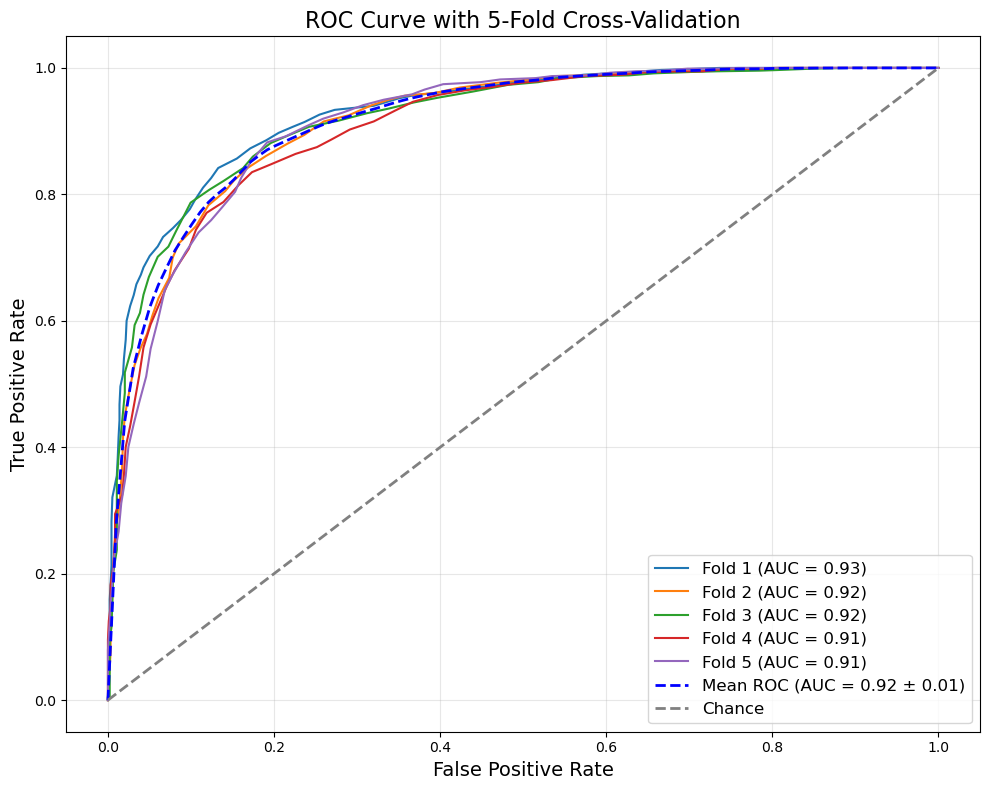

In [38]:
# Define the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics and ROC data
metrics_list = []
tprs = []  # True Positive Rates for ROC
mean_fpr = np.linspace(0, 1, 100)  # Mean False Positive Rates for ROC
auc_scores = []  # AUC scores for ROC

# Function to calculate sensitivity, specificity, PPV, NPV
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    ppv = cm[1, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) != 0 else 0
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0]) if (cm[0, 0] + cm[1, 0]) != 0 else 0
    return sensitivity, specificity, ppv, npv

# Perform cross-validation
plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and classes
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    sensitivity, specificity, ppv, npv = calculate_metrics(y_test, y_pred)
    
    # Store metrics in a dictionary
    metrics_list.append({
        "Fold": fold + 1,
        "Accuracy": accuracy,
        "AUC": roc_auc,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "PPV": ppv,
        "NPV": npv
    })
    
    # Plot ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_scores.append(roc_auc)
    
    # Interpolate TPR for mean curve
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    
    plt.plot(fpr, tpr, label=f"Fold {fold + 1} (AUC = {roc_auc:.2f})")

# Compute mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_scores)

# Plot the mean ROC curve
plt.plot(mean_fpr, mean_tpr, color="blue", linestyle="--",
         label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2)

# Plot chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Chance")

# Add labels, legend, and title
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve with 5-Fold Cross-Validation", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

# Show the ROC plot
plt.tight_layout()
plt.show()

In [39]:
# Convert the metrics list to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display metrics for each fold
print(metrics_df)

# Calculate and display the average metrics across all folds
average_metrics = metrics_df.drop(columns=['Fold']).mean()
print("\nAverage Metrics:")
print(average_metrics)

   Fold  Accuracy       AUC  Sensitivity  Specificity       PPV       NPV
0     1  0.804708  0.930620     0.640642     0.968951  0.953822  0.729251
1     2  0.766185  0.916642     0.579229     0.952941  0.924786  0.693925
2     3  0.711991  0.920899     0.441113     0.982869  0.962617  0.637500
3     4  0.668630  0.908399     0.356531     0.980728  0.948718  0.603823
4     5  0.752141  0.914443     0.555675     0.948608  0.915344  0.681015

Average Metrics:
Accuracy       0.740731
AUC            0.918201
Sensitivity    0.514638
Specificity    0.966819
PPV            0.941057
NPV            0.669103
dtype: float64
